In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 60k images of 28px by 28px
x_train.shape

(60000, 28, 28)

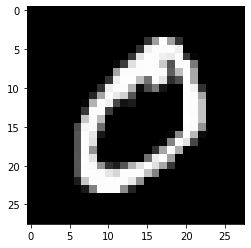

In [4]:
plt.imshow(x_train[1,:,:],cmap='gray');

In [5]:
y_train[1]

0

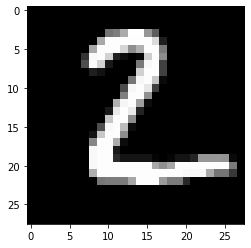

In [6]:
plt.imshow(x_test[1,:,:], cmap='gray');

In [7]:
y_train[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [8]:
l = pd.DataFrame(y_train)
l[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [9]:
# Convert 28x28 image to 784-dimension vector

x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')

In [10]:
x_test.shape

(10000, 784)

In [11]:
# Original values are 0 (black) to 255 (white)
# Normalize the data
x_train /= 255
x_test /= 255

In [12]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1)

Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2715 - accuracy: 0.9234 0s - loss: 0.2785 - accuracy
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0962 - accuracy: 0.9717 0s - loss: 0.0965 - accuracy
Epoch 3/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0599 - accuracy: 0.9817 2s - loss: 0
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0303 - accuracy: 0.9909
Epoch 6/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0201 - accuracy: 0.9940
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0152 - accuracy: 0.9954
Epoch 8/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0143 - accuracy: 0.9958
Epoch 9/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0078 - accuracy: 0.9979
Epoch 10/10
235/235 

In [17]:
model2 = Sequential()

In [18]:
model2.add(Dense(784, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [19]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model2.fit(x_train, y_train, epochs=10, batch_size=512, verbose=1)

Epoch 1/10
118/118 [==============================] - 4s 36ms/step - loss: 0.3673 - accuracy: 0.8992
Epoch 2/10
118/118 [==============================] - 5s 39ms/step - loss: 0.1274 - accuracy: 0.9628
Epoch 3/10
118/118 [==============================] - 4s 35ms/step - loss: 0.0794 - accuracy: 0.9760
Epoch 4/10
118/118 [==============================] - 4s 36ms/step - loss: 0.0544 - accuracy: 0.9837 0s - loss: 0.0544 - ac
Epoch 5/10
118/118 [==============================] - 5s 42ms/step - loss: 0.0424 - accuracy: 0.9870 0s - loss: 0.0423 - accuracy: 0.
Epoch 6/10
118/118 [==============================] - 6s 52ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 7/10
118/118 [==============================] - 5s 46ms/step - loss: 0.0234 - accuracy: 0.9930
Epoch 8/10
118/118 [==============================] - 5s 46ms/step - loss: 0.0137 - accuracy: 0.9961
Epoch 9/10
118/118 [==============================] - 5s 44ms/step - loss: 0.0123 - accuracy: 0.9966
Epoch 10/10
118/118 [==============

In [21]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.980
Loss: 0.071


In [22]:
loss, acc = model2.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.982
Loss: 0.070


In [23]:
y_predict = model.predict(x_test)

In [24]:
# 99% sure this is a 7
y_predict[0]

array([5.0100452e-10, 1.1089145e-08, 2.0738024e-10, 5.2220532e-08,
       4.5749025e-12, 9.7046010e-11, 3.0004285e-14, 9.9999976e-01,
       1.8324610e-10, 1.0325525e-07], dtype=float32)

In [25]:
np.argmax(y_predict[0])

7

In [26]:
# This is the code provided in the video for generating a confusion matrix, but it doesn't run
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [27]:
cr = metrics.classification_report(y_test, y_pred)
print(cr)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets